# **Assignment 5: matplotlib**
- **you will learn:** using joins, aggregation, groupby in Pandas
- **task:**  See section 5.7 below
- **deadline:** 01.12.2025
- [Matplotlib documentation](https://matplotlib.org/stable/users/index)
- 📝 **Reminder:** Sync your GitHub repository with the main course repository, update your project in PyCharm, and after completing the assignment, commit and push your changes back to GitHub.
- Another useful (but not covered by this tutorial) package is [Seaborn](https://seaborn.pydata.org)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)

NumPy version: 2.3.3
Pandas version: 2.3.3
Matplotlib version: 3.10.7


## **5.1 Basic plots**

- matplotlib works perfectly with pandas or numpy
- the easiest way to create a plot is just via plt.plot()

In [ ]:
x = np.linspace(0, 10, 50)
y = np.sin(x)

In [ ]:
plt.plot(x,y)  # basic usage

In [ ]:
plt.plot(y)  # also works without x-axis values

In [ ]:
plt.plot(x,y, 'bo')  # blue

In [ ]:
plt.plot(x,y, 'r+')  # red

In [ ]:
plt.plot(x, y, marker='o', linestyle='-', color='indigo')  # colors can be found at https://matplotlib.org/stable/gallery/color/named_colors.html

In [ ]:
plt.plot(x, y, linestyle='--', linewidth=2.5, color='#0C6F78')  # any color works, e.g. via HEX code, see https://htmlcolorcodes.com

In [ ]:
# More advanced settings are available via various plt.* methods
plt.figure(figsize=(8, 3))  # width first, height second (note: not like matrix dimensions)
plt.plot(x, y, label='Sine function', color='indigo')

plt.xlabel('x', fontsize=16)  # works also with latex, 
plt.ylabel('sin(x)', fontsize=16)

plt.title('Plot of the Sine Function', fontsize=18)
plt.legend(loc='lower right', fontsize=14)

In [ ]:
# matplotlib works well with latex

# We have two options
# 1) Use built-in mathtext: just enhance your string '$\delta$' with r -> r'$\delta'
# 2) Call plt.rcParams['text.usetex'] = True, which supposes certain latex packages to be installed, and then again use the r notation, see https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html

plt.figure(figsize=(8, 3))
plt.plot(x, y, label='Sine function', color='indigo')

# Labels with LaTeX
plt.xlabel(r'$\delta$', fontsize=16)  # latex
plt.ylabel(r'$\sum_{n=0}^\infty (-1)^n \frac{x^{2n+1}}{(2n+1)!}$', fontsize=16)  # latex

plt.title('Plot of the Sine Function', fontsize=18)
plt.legend(loc='lower right', fontsize=14)

In [ ]:
# also histogram is available
np.random.seed(42)
plt.hist(np.random.normal(0, 1.5, 200), density=False)  # set density=True to normalize

# for more options, see here https://matplotlib.org/stable/plot_types/index.html

## 5.2 Figure and axis

- we need to understand the concepts of figure and axis for more complicated plots
- Figure: the entire canvas or window that contains one or more axes
- Axis: The actual plot area. It contains x-axis, y-axis, plot lines, texts, markers, grids,...

In [ ]:
x = np.linspace(0, 10, 50)
sin = np.sin(x)
cos = np.cos(x)

# We can combine multiple lines/dots/... into a single figure
plt.plot(x,sin)
plt.plot(x,cos)  # we add another line to the same axis within the same figure

In [ ]:
# In Matplotlib, plt.plot() adds a line to the current Axes in the current Figure.
# The current figure can be accessed using plt.gcf().

fig = plt.gcf()
print("Initial number of axes in the current figure:", len(fig.get_axes()))

In [ ]:
# In a Jupyter notebook, each cell implicitly starts with a new figure if none exists.
# Initially, there may be no axes. Adding a line automatically creates an Axes.
plt.plot(x, sin)
print("After adding sin(x), number of axes:", len(fig.get_axes()))
for i, ax in enumerate(fig.get_axes()):
    print(f"Axes {i} has {len(ax.get_lines())} line(s)")

plt.plot(x, cos)
print("After adding cos(x), number of axes:", len(fig.get_axes()))  # No new axes added
for i, ax in enumerate(fig.get_axes()):
    print(f"Axes {i} has {len(ax.get_lines())} line(s)")  # More lines added to existing axes

In [ ]:
# Calling plt.show() displays the figure and may reset the figure state in (some) environments (otherwise plt.clf() has to be called for reset)
fig = plt.gcf()
print("Number of axes after plt.show():", len(fig.get_axes()))

plt.plot(x, sin)
print("After adding sin(x), number of axes:", len(fig.get_axes()))
for i, ax in enumerate(fig.get_axes()):
    print(f"Axes {i} has {len(ax.get_lines())} line(s)")
    
plt.show()

plt.plot(x, cos)
print("After adding cos(x), number of axes:", len(fig.get_axes()))  # Still the same axes
for i, ax in enumerate(fig.get_axes()):
    print(f"Axes {i} has {len(ax.get_lines())} line(s)")  # Number of lines increased

In [ ]:
# To access multiple figures, you store them in variables

fig1 = plt.figure()
fig2 = plt.figure()

# ------------------------------
# Figure 1
ax1 = fig1.add_subplot(111)  # add a single axis to the figure, XYZ encodes: Zth axis in a X-row, Y-column layout
ax1.plot(x, sin, color='indigo', label='sin(x)')
ax1.plot(x, cos, color='yellow', label='cos(x)')
ax1.set_title("Figure 1: Sin and Cos")
ax1.legend()

# ------------------------------
# Figure 2
ax2 = fig2.add_subplot(111)
ax2.plot(x, sin, color='blue', label='sin(x)')
ax2.plot(x, cos, color='red', label='cos(x)')
ax2.set_title("Figure 2: Sin and Cos")
ax2.legend()

# ------------------------------
# Combined figure with multiple axes
fig_combined = plt.figure()

# NOTE: The subplot codes must be 211 and 212 for a 2-row, 1-column layout
combined_ax1 = fig_combined.add_subplot(211)
combined_ax2 = fig_combined.add_subplot(212)

# First axis
combined_ax1.plot(x, sin, color='indigo', label='sin(x)')
combined_ax1.plot(x, cos, color='yellow', label='cos(x)')
combined_ax1.set_title("Combined Figure – Top Axes")
combined_ax1.legend()

# Second axis
combined_ax2.plot(x, sin, color='blue', label='sin(x)')
combined_ax2.plot(x, cos, color='red', label='cos(x)')
combined_ax2.set_title("Combined Figure – Bottom Axes")
combined_ax2.legend()

# A figure-level title (applies to the whole figure)
fig_combined.suptitle("Combined figure: Sinus and Cosinus plotted twice with different styles")

In [ ]:
# Having the figures stored, we can access them also in a different notebook cell
print("Fig1, number of axes", len(fig1.get_axes()))
print("Fig2, number of axes:", len(fig2.get_axes()))
print("Combined figure, number of axes:", len(fig_combined.get_axes()))

# Now we can modify the figure
ax2.plot(x,x)
fig2

In [ ]:
# We can even put multiple axes over 
# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)          # Values for left y-axis
y2 = np.exp(0.3 * x)    # Values for right y-axis

# Create figure and left y-axis
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'g-', label='sin(x)')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('sin(x)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Create right y-axis
ax2 = ax1.twinx()
ax2.plot(x, y2, 'b--', label='exp(0.3x)')
ax2.set_ylabel('exp(0.3x)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Matplotlib: Two Y-axes Example')
plt.show()

## 5.3 Pandas integration

In [ ]:
# Generate example data
np.random.seed(42)
n = 150
df = pd.DataFrame({
    "x": np.random.normal(50, 10, n),
    "y": np.random.normal(100, 20, n),
    "z": np.random.choice(["A", "B", "C"], n),
    "w": np.random.uniform(20, 200, n)  # size variable
})

plt.figure(figsize=(9, 7))

# --- Scatter by group ---
groups = df.groupby("z")
for name, group in groups:
    plt.scatter(group["x"], group["y"], 
                s=group["w"], 
                alpha=0.6,
                label=f"Group {name}")

# --- Regression line ---
coef = np.polyfit(df["x"], df["y"], 1)
poly = np.poly1d(coef)
xs = np.linspace(df["x"].min(), df["x"].max(), 200)
plt.plot(xs, poly(xs), color="black", linewidth=2, label="Regression Line")

# --- Size Legend (accurate scale) ---
# Choose representative sizes based on the data range
size_values = [50, 100, 150, 200]
size_handles = [
    plt.scatter([], [], s=s, color="gray", alpha=0.6)
    for s in size_values
]

first_legend = plt.legend(title="Groups", loc="upper left")
plt.gca().add_artist(first_legend)

plt.legend(size_handles,
           [f"{s}" for s in size_values],
           title="Marker Size",
           loc="upper right")

# --- Labels & styling ---
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot with Groups, Marker Sizes, and Regression Line")

plt.show()

In [ ]:
df = pd.DataFrame({
    'Group': ['A', 'B', 'C', 'D', 'E'],
    'category1': [50, 30, 70, 90, 60],
    'category2': [200, 150, 100, 250, 180],
    'category3': [500, 600, 400, 700, 550],
    'category4': [1000, 900, 800, 1200, 950]
})
df.set_index('Group', inplace=True)

# Plotting
ax = df.plot(kind='bar', figsize=(12, 6), logy=True)  # log-scaled y-axis
plt.title("Log-Scaled Bar Chart Example")
plt.ylabel("Values (log scale)")
plt.xlabel("Groups")
plt.xticks(rotation=0)
plt.legend(title='Categories')
plt.show()

## 5.4 Ticks

- In Matplotlib, ticks are the markers denoting data points along the axes of a plot. They indicate the positions and often come with labels that describe those positions. Essentially, ticks help users read values off the axes.

In [ ]:
# We begin with a time series 

from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Generate datetime data: one value per day
start = datetime(2024, 1, 1)
dates = np.array([start + timedelta(days=i) for i in range(120)])
values = np.sin(np.linspace(0, 6*np.pi, len(dates)))

# A) Default behavior
fig, ax = plt.subplots()
ax.plot(dates, values)
ax.set_title("1A — Full datetime ticks (auto)")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

# B) Months only
fig, ax = plt.subplots()
ax.plot(dates, values)

ax.set_title("1B — Monthly ticks only")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

# C) Weeks only
fig, ax = plt.subplots()
ax.plot(dates, values)

ax.set_title("1C — Weekly ticks only")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [ ]:
# Unevenly spaced axis values

x = np.array([0, 1, 2.5, 3, 7.8, 8, 10])
y = np.random.randn(len(x))

# A) Actual spacing
fig, ax = plt.subplots()
ax.plot(x, y, marker="o")
ax.set_title("2A — Actual non-equidistant spacing on x-axis")
ax.set_xlabel("Actual x-values")
plt.show()

# B) Equidistant spacing
fig, ax = plt.subplots()
ax.plot(np.arange(len(x)), y, marker="o")

ax.set_title("2B — Force equidistant ticks (categorical style)")
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels([str(v) for v in x])

plt.show()

In [ ]:
# The case of too many ticks
fig, ax = plt.subplots(1, 3, figsize=(15, 4))  # Added a third subplot

x = [f'{xx}' for xx in np.arange(100)]
y = np.arange(100)

# Original subplot 1
ax[0].plot(x, y)
ax[0].tick_params(axis='x', color='r', labelcolor='r')
ax[0].set_title('Too many ticks')
ax[0].set_xlabel('Categories')

# Original subplot 2
ax[1].plot(np.asarray(x, float), y)
ax[1].set_title('x converted to numbers')
ax[1].set_xlabel('Floats')

# New subplot 3: adjustable number of ticks
ax[2].plot(np.asarray(x, float), y)
ax[2].set_title('Adjusted number of ticks')
ax[2].set_xlabel('Floats')
ax[2].xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(nbins=20))  # Adjust to 10 ticks max

plt.tight_layout()
plt.show()

In [ ]:
# Manual ticks

# Pi
x4 = np.linspace(0, 10, 400)
y4 = np.sin(x4)

fig, ax = plt.subplots()
ax.plot(x4, y4)

ax.set_title("4A — Fully custom ticks")
ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi])
ax.set_xticklabels(["0", r'$\pi$', r'$2\pi$', r'$3\pi$'])
ax.tick_params(axis='x', rotation=45, labelsize=10, length=8, color='red')

plt.show()

# Arbitrary
fig, ax = plt.subplots()
ax.plot(x4, y4)

ax.set_title("4B — Arbitrary custom labels")
ax.set_xticks([1, 4, 7, 9])
ax.set_xticklabels(["Low", "Medium", "High", "Extreme"])

plt.show()

# Formatting
def percent_format(x, pos):
    return f"{x*10:.1f}%"

fig, ax = plt.subplots()
xs = np.linspace(0, 1, 50)
ax.plot(xs, xs**2)

ax.set_title("4C — Custom formatter (percent scale)")
from matplotlib.ticker import FuncFormatter
ax.xaxis.set_major_formatter(FuncFormatter(percent_format))

plt.show()

## 5.5 Interactive plots

By default, plots are static in Jupyter Notebook, but you can make them interactive using %matplotlib notebook or widgets.

In [ ]:
# enable interactive plots
%matplotlib notebook

x = np.linspace(0, 10, 100)
y = np.sin(x)

In [ ]:
# Basic interactive plot
fig, ax = plt.subplots()
line, = ax.plot(x, y, label='sin(x)')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Interactive Plot Example')
ax.legend()

plt.show()

In [ ]:
# Real-time adjustments
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
l, = plt.plot(x, np.sin(x), lw=2)

axfreq = plt.axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(axfreq, 'Freq', 0.1, 5.0, valinit=1.0)

def update(val):
    freq = freq_slider.val
    l.set_ydata(np.sin(freq * x))
    fig.canvas.draw_idle()

freq_slider.on_changed(update)
plt.show()

## 5.6 Animations

In [ ]:
from matplotlib import animation

def f(x,t):
    return np.sin(x-3*t)

x = np.linspace(0, 10*np.pi, 1000)
t = np.arange(0, 24, 1/60)
X, T = np.meshgrid(x, t)
F = f(X, T)

plt.plot(x, F[1])

fig, ax = plt.subplots(1,1, figsize=(8,4))
ln1, = plt.plot([], [])
time_text = ax.text(0.65, 0.95, '', fontsize=15,
                    bbox=dict(facecolor='white', edgecolor='black'), 
                    transform=ax.transAxes)
ax.set_xlim(0,10*np.pi)
ax.set_ylim(-1.5, 1.5)

def animate(i):
    ln1.set_data(x, F[i])
    time_text.set_text('t={:.2f}'.format(i/60))
    
ani = animation.FuncAnimation(fig, animate, frames=240, interval=50)
ani.save('ani.gif',writer='pillow',fps=50,dpi=100)

## 5.7 Homework: Visualisation in Data Science

### Task overview
In this assignment, you will practice working with **Matplotlib** in Data Science. You are given a code that already generates a plot (a typical situation when working e.g. with a LLM that has provided improper results) and your task is to adjust it.

### Your Task
You are provided with a Python script that generates side-by-side boxplots grouped by group1 and group2 from a CSV file. Your task is to enhance this plot with additional statistical and aesthetic features to improve readability and insight.

Disclaimer: Due to the nature of the data (a single outlier with very large value), the plot scale and axis limits prevent from good visibility.

### 1. Global Average and Standard Deviation Lines
- Compute the global average of all `value`s.  
- Plot a **solid horizontal line representing the global average.  
- Plot dashed horizontal lines for `average ± standard deviation`.  
- Add text labels showing the numeric value together with its description using LaTex (e.g. for average we would use $\mu=...$) for each line, positioned clearly and legibly.

### 2. Ignore Outliers for Y-Axis Scaling
- Identify the largest value in the dataset.
- Set limits to y-axis so that this value is ignored and not plotted (however, make sure its used for computation of the boxplots and all statistics)

### 3. Logarithmic Y-Axis
- Put the y-axis in logarithmic scale.

### 4. Legend Placement
- Create a legend and place it below the x-axis for better visual clarity.

### 5. Figure Title
- Ensure the figure has a descriptive title.

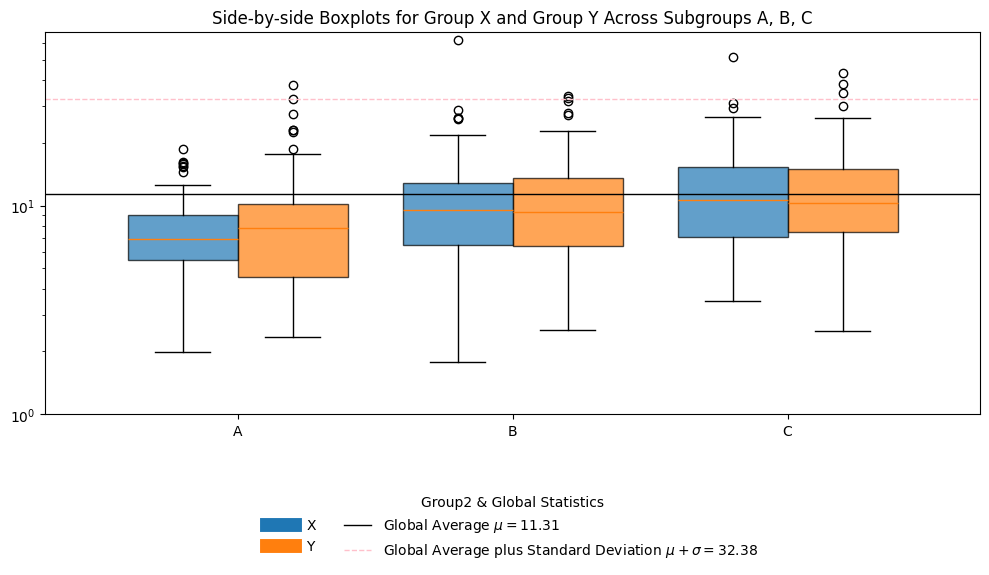

In [2]:
# Load data
df = pd.read_csv("data/boxplot_data.csv")   # columns: group1, group2, value
# Prepare grouping
group1_levels = sorted(df["group1"].unique())
group2_levels = sorted(df["group2"].unique())

# Width settings for side-by-side boxplots
n2 = len(group2_levels)
box_width = 0.8 / n2  # total width of 0.8 split across group2 levels

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each group2 as a separate series of boxplots
for i, g2 in enumerate(group2_levels):
    positions = np.arange(len(group1_levels)) - 0.4 + (i + 0.5) * box_width
    data_for_g2 = []
    for g1 in group1_levels:
        subset = df[(df["group1"] == g1) & (df["group2"] == g2)]["value"]
        data_for_g2.append(subset.values)

    bp = ax.boxplot(
        data_for_g2,
        positions=positions,
        widths=box_width,
        patch_artist=True
    )

    # color each group2 consistently
    color = plt.cm.tab10(i % 10)
    for patch in bp['boxes']:
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

ax.set_xticks(np.arange(len(group1_levels)))
ax.set_xticklabels(group1_levels)

# Build legend manually
legend_handles = [
    plt.Line2D([0], [0], color=plt.cm.tab10(i % 10), lw=10)
    for i in range(n2)
]


#1.
mu=df['value'].mean() #computes the overall mean
sd = df['value'].std() # computes the overall standard deviation
plt.axhline(y=mu, color='black',linewidth=1) #plots a horizontal line at level mu
plt.axhline(y=(mu+sd), color='pink', linestyle='--', linewidth=1) #plots a horizontal line at level mu+sd
plt.axhline(y=(mu-sd), color='pink', linestyle='--',linewidth=1)#plots a horizontal line at level mu-sd

#2.
outlier=df['value'].max() #finds outlier
df_new = df[df["value"] != outlier] #creates a new df without outlier


ymax = df_new["value"].max()*1.1 # uses the new df for the setting of ymax
ax.set_ylim(-12, ymax)

#3.
ax.set_ylim(1, ymax)
ax.set_yscale("log")

#4.
# legend items for mu and sd
stat_handles = [
    plt.Line2D([0], [0], color="black", lw=1),
    plt.Line2D([0], [0], color="pink", lw=1, linestyle="--")
]

stat_labels = [
    fr"Global Average $\mu = {mu:.2f}$",
    fr"Global Average plus Standard Deviation $\mu + \sigma = {mu+sd:.2f}$"
]
#creates the personalised legend
ax.legend(
    legend_handles + stat_handles,
    group2_levels + stat_labels,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=2,
    frameon=False,
    title="Group2 & Global Statistics"
)

#5
ax.set_title("Side-by-side Boxplots for Group X and Group Y Across Subgroups A, B, C")




plt.tight_layout()
plt.show()